In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## ***Data Loading***

In [2]:
try:
    df = pd.read_excel("GPS_Tracking_Dataset_Updated_Filled.xlsx")
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'GPS_Tracking_Dataset_Updated_Filled.xlsx' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Timestamp,Vehicle_ID,Latitude,Longitude,Speed (km/h),Engine_Status,Fuel_Level (%),Battery_Level (%),Problem_Code,Alert,Tire_Pressure (PSI),Inside_Temperature (°C)
0,2025-04-14 09:00:00,BUS001,12.979538,77.595413,0,ON,56,89,NaN,No Alert,36,23.3
1,2025-04-14 09:10:00,BUS001,12.973568,77.599466,50,ON,59,96,NaN,No Alert,35,29.1
2,2025-04-14 09:20:00,BUS002,12.973790,77.592727,20,ON,79,91,NaN,No Alert,31,34.0
3,2025-04-14 09:30:00,BUS001,12.971349,77.597049,30,ON,97,37,NaN,No Alert,29,34.9
4,2025-04-14 09:40:00,BUS001,12.974798,77.595387,45,ON,37,48,NaN,No Alert,35,22.8


(100, 12)


## ***Data Exploration***

In [3]:
print("Data Types:\n", df.dtypes)

# Missing Value Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Descriptive Statistics
numerical_cols = ['Speed (km/h)', 'Latitude', 'Longitude', 'Fuel_Level (%)', 'Battery_Level (%)', 'Tire_Pressure (PSI)', 'Inside_Temperature (°C)']
print("\nDescriptive Statistics:\n", df[numerical_cols].describe())

Data Types:
 Timestamp                  datetime64[ns]
Vehicle_ID                         object
Latitude                          float64
Longitude                         float64
Speed (km/h)                        int64
Engine_Status                      object
Fuel_Level (%)                      int64
Battery_Level (%)                   int64
Problem_Code                       object
Alert                              object
Tire_Pressure (PSI)                 int64
Inside_Temperature (°C)           float64
dtype: object

Missing Values:
 Timestamp                   0
Vehicle_ID                  0
Latitude                    0
Longitude                   0
Speed (km/h)                0
Engine_Status               0
Fuel_Level (%)              0
Battery_Level (%)           0
Problem_Code               88
Alert                       0
Tire_Pressure (PSI)         0
Inside_Temperature (°C)     0
dtype: int64

Missing Value Percentage:
 Timestamp                   0.0
Vehicle_ID        

Text(0, 0.5, 'Frequency')

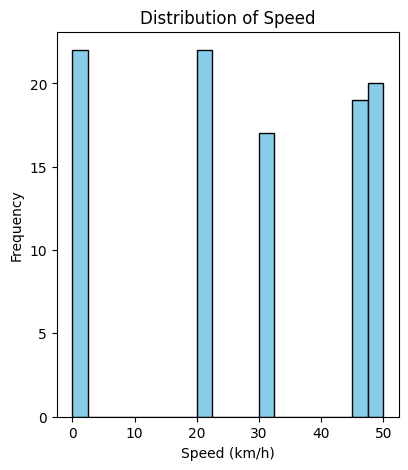

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['Speed (km/h)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

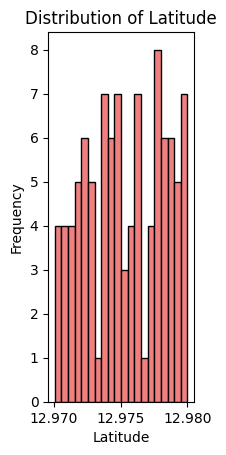

In [6]:
plt.subplot(1, 3, 2)
plt.hist(df['Latitude'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

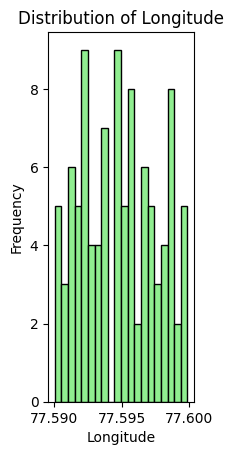

In [7]:
plt.subplot(1, 3, 3)
plt.hist(df['Longitude'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

In [8]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


Correlation Matrix:
                          Speed (km/h)  Latitude  Longitude  Fuel_Level (%)  \
Speed (km/h)                 1.000000  0.111500  -0.012566       -0.181025   
Latitude                     0.111500  1.000000   0.015923        0.011076   
Longitude                   -0.012566  0.015923   1.000000       -0.193559   
Fuel_Level (%)              -0.181025  0.011076  -0.193559        1.000000   
Battery_Level (%)           -0.025181  0.058360  -0.038309        0.006035   
Tire_Pressure (PSI)          0.163337  0.214970   0.060006        0.071466   
Inside_Temperature (°C)     -0.071664 -0.050327   0.102303       -0.001948   

                         Battery_Level (%)  Tire_Pressure (PSI)  \
Speed (km/h)                     -0.025181             0.163337   
Latitude                          0.058360             0.214970   
Longitude                        -0.038309             0.060006   
Fuel_Level (%)                    0.006035             0.071466   
Battery_Level (%) 

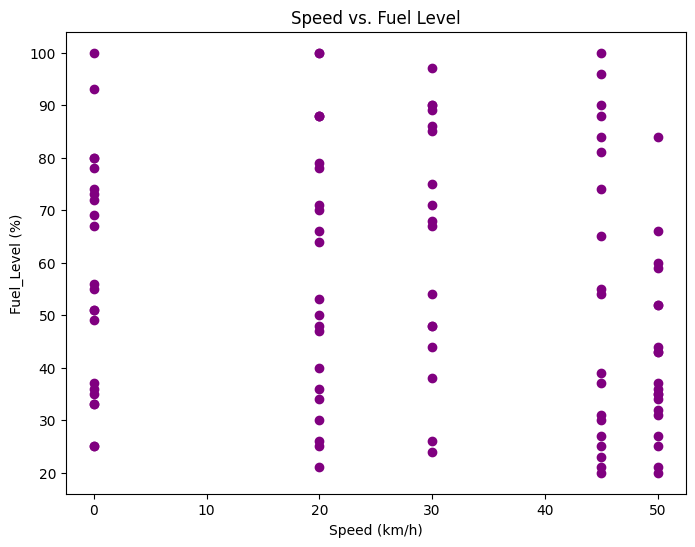


Unique values and frequencies for Vehicle_ID:
Vehicle_ID
BUS001    53
BUS002    47
Name: count, dtype: int64


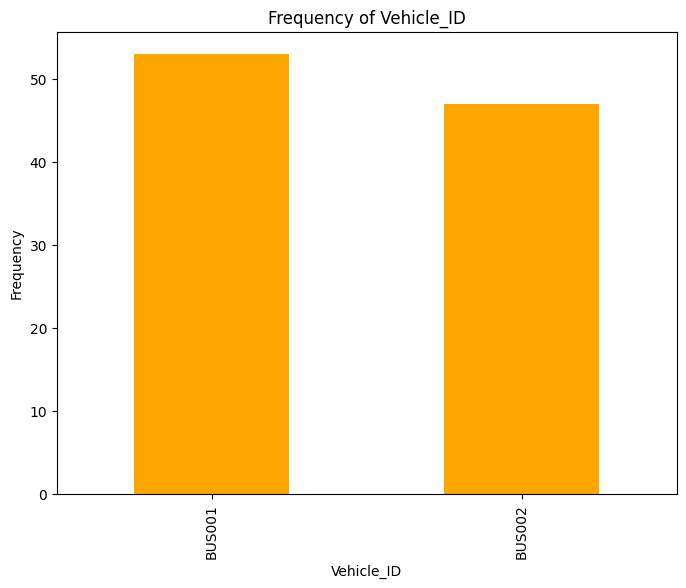


Unique values and frequencies for Engine_Status:
Engine_Status
ON     92
OFF     8
Name: count, dtype: int64


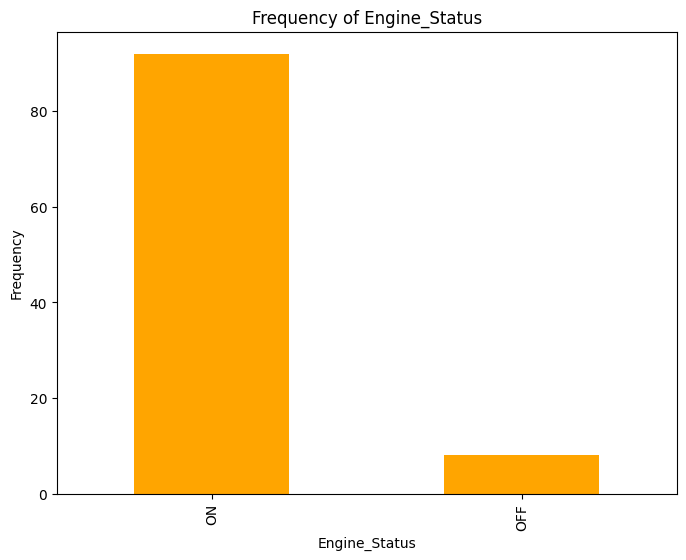


Unique values and frequencies for Alert:
Alert
No Alert       88
Battery Low     7
Fuel Low        5
Name: count, dtype: int64


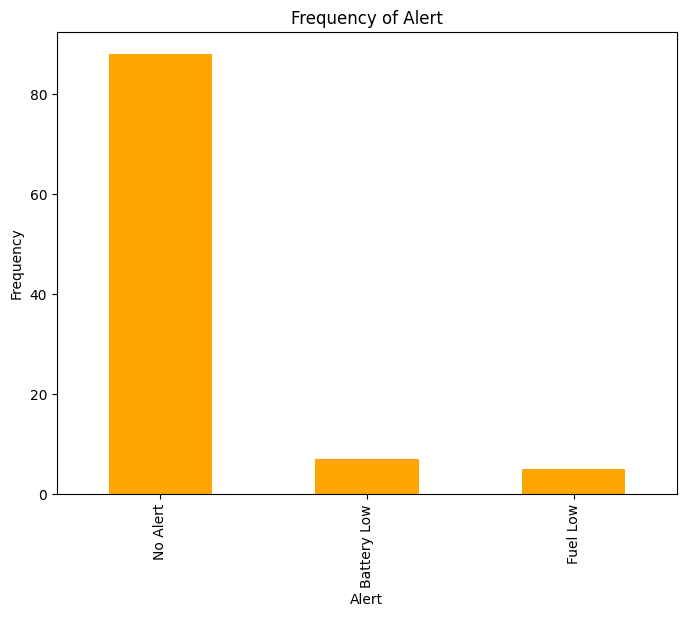


Summary:
The dataset shows the GPS tracking data of vehicles.  There are missing values in the 'Problem_Code' column. The distribution of speed, latitude, and longitude provide insights into vehicle movement. The correlation analysis reveals relationships between numerical features. The frequency of different vehicle IDs, engine statuses, and alerts are also analyzed.


In [9]:
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(df['Speed (km/h)'], df['Fuel_Level (%)'], color='purple')
plt.title('Speed vs. Fuel Level')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel_Level (%)')
plt.show()

# Categorical Column Analysis
categorical_cols = ['Vehicle_ID', 'Engine_Status', 'Alert']
for col in categorical_cols:
    print(f"\nUnique values and frequencies for {col}:\n{df[col].value_counts()}")

    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

print("\nSummary:")
print("The dataset shows the GPS tracking data of vehicles.  There are missing values in the 'Problem_Code' column. The distribution of speed, latitude, and longitude provide insights into vehicle movement. The correlation analysis reveals relationships between numerical features. The frequency of different vehicle IDs, engine statuses, and alerts are also analyzed.")

## ***Data Cleaning***

In [10]:
df['Problem_Code'] = df['Problem_Code'].fillna(df['Problem_Code'].mode()[0])

df.drop_duplicates(inplace=True)

In [11]:
Q1 = df['Speed (km/h)'].quantile(0.25)
Q3 = df['Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Speed (km/h)'] = df['Speed (km/h)'].clip(lower=lower_bound, upper=upper_bound)

In [12]:
df = df[(df['Latitude'] >= 12.5) & (df['Latitude'] <= 13.5) & (df['Longitude'] >= 77) & (df['Longitude'] <= 78)]

# Data Validation
print("Shape of cleaned DataFrame:", df.shape)
display(df.head())

Shape of cleaned DataFrame: (100, 12)


,Timestamp,Vehicle_ID,Latitude,Longitude,Speed (km/h),Engine_Status,Fuel_Level (%),Battery_Level (%),Problem_Code,Alert,Tire_Pressure (PSI),Inside_Temperature (°C)
0,2025-04-14 09:00:00,BUS001,12.979538,77.595413,0,ON,56,89,E02,No Alert,36,23.3
1,2025-04-14 09:10:00,BUS001,12.973568,77.599466,50,ON,59,96,E02,No Alert,35,29.1
2,2025-04-14 09:20:00,BUS002,12.973790,77.592727,20,ON,79,91,E02,No Alert,31,34.0
3,2025-04-14 09:30:00,BUS001,12.971349,77.597049,30,ON,97,37,E02,No Alert,29,34.9
4,2025-04-14 09:40:00,BUS001,12.974798,77.595387,45,ON,37,48,E02,No Alert,35,22.8


## ***Data wrangling***

In [15]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Distance'] = 0.0
for i in range(1, len(df)):
    df.loc[i, 'Distance'] = haversine(df.loc[i-1, 'Latitude'], df.loc[i-1, 'Longitude'], df.loc[i, 'Latitude'], df.loc[i, 'Longitude'])

In [16]:
df['Time_Difference'] = df['Timestamp'].diff().dt.total_seconds() / 60

# Calculate average speed, handling zero time differences
df['Average_Speed'] = df['Distance'] / df['Time_Difference']
df['Average_Speed'].replace([np.inf, -np.inf], 0, inplace=True)
df['Average_Speed'].fillna(0, inplace=True)

display(df.head())

<ipython-input-16-25a65de7a2e0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average_Speed'].replace([np.inf, -np.inf], 0, inplace=True)
<ipython-input-16-25a65de7a2e0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,Timestamp,Vehicle_ID,Latitude,Longitude,Speed (km/h),Engine_Status,Fuel_Level (%),Battery_Level (%),Problem_Code,Alert,Tire_Pressure (PSI),Inside_Temperature (°C),Distance,Time_Difference,Average_Speed
0,2025-04-14 09:00:00,BUS001,12.979538,77.595413,0,ON,56,89,E02,No Alert,36,23.3,0.000000,NaN,0.000000
1,2025-04-14 09:10:00,BUS001,12.973568,77.599466,50,ON,59,96,E02,No Alert,35,29.1,0.796202,10.0,0.079620
2,2025-04-14 09:20:00,BUS002,12.973790,77.592727,20,ON,79,91,E02,No Alert,31,34.0,0.730861,10.0,0.073086
3,2025-04-14 09:30:00,BUS001,12.971349,77.597049,30,ON,97,37,E02,No Alert,29,34.9,0.541460,10.0,0.054146
4,2025-04-14 09:40:00,BUS001,12.974798,77.595387,45,ON,37,48,E02,No Alert,35,22.8,0.423823,10.0,0.042382


In [17]:
df['Average_Speed'] = df['Distance'] / df['Time_Difference']
df['Average_Speed'] = df['Average_Speed'].replace([np.inf, -np.inf], 0)
df['Average_Speed'] = df['Average_Speed'].fillna(0)

display(df.head())

,Timestamp,Vehicle_ID,Latitude,Longitude,Speed (km/h),Engine_Status,Fuel_Level (%),Battery_Level (%),Problem_Code,Alert,Tire_Pressure (PSI),Inside_Temperature (°C),Distance,Time_Difference,Average_Speed
0,2025-04-14 09:00:00,BUS001,12.979538,77.595413,0,ON,56,89,E02,No Alert,36,23.3,0.000000,NaN,0.000000
1,2025-04-14 09:10:00,BUS001,12.973568,77.599466,50,ON,59,96,E02,No Alert,35,29.1,0.796202,10.0,0.079620
2,2025-04-14 09:20:00,BUS002,12.973790,77.592727,20,ON,79,91,E02,No Alert,31,34.0,0.730861,10.0,0.073086
3,2025-04-14 09:30:00,BUS001,12.971349,77.597049,30,ON,97,37,E02,No Alert,29,34.9,0.541460,10.0,0.054146
4,2025-04-14 09:40:00,BUS001,12.974798,77.595387,45,ON,37,48,E02,No Alert,35,22.8,0.423823,10.0,0.042382


## ***Data analysis***

Speed (km/h)                                                     \
                  count       mean        std  min   25%   50%   75%   max   
Vehicle_ID                                                                   
BUS001             53.0  26.981132  19.546287  0.0   0.0  30.0  45.0  50.0   
BUS002             47.0  29.255319  17.382485  0.0  20.0  30.0  45.0  50.0   

           Distance            ... Fuel_Level (%)        Battery_Level (%)  \
              count      mean  ...            75%    max             count   
Vehicle_ID                     ...                                           
BUS001         53.0  0.500901  ...           78.0  100.0              53.0   
BUS002         47.0  0.530183  ...           73.0  100.0              47.0   

                                                                
                 mean        std   min   25%   50%   75%   max  
Vehicle_ID                                                      
BUS001      62.660377  21.594999  30.0  44.0  63.0  82.0  99.0  
BUS002      64.829787  21.364659  33.0  44.5  67.0  83.5  99.0  

[2 rows x 48 columns]

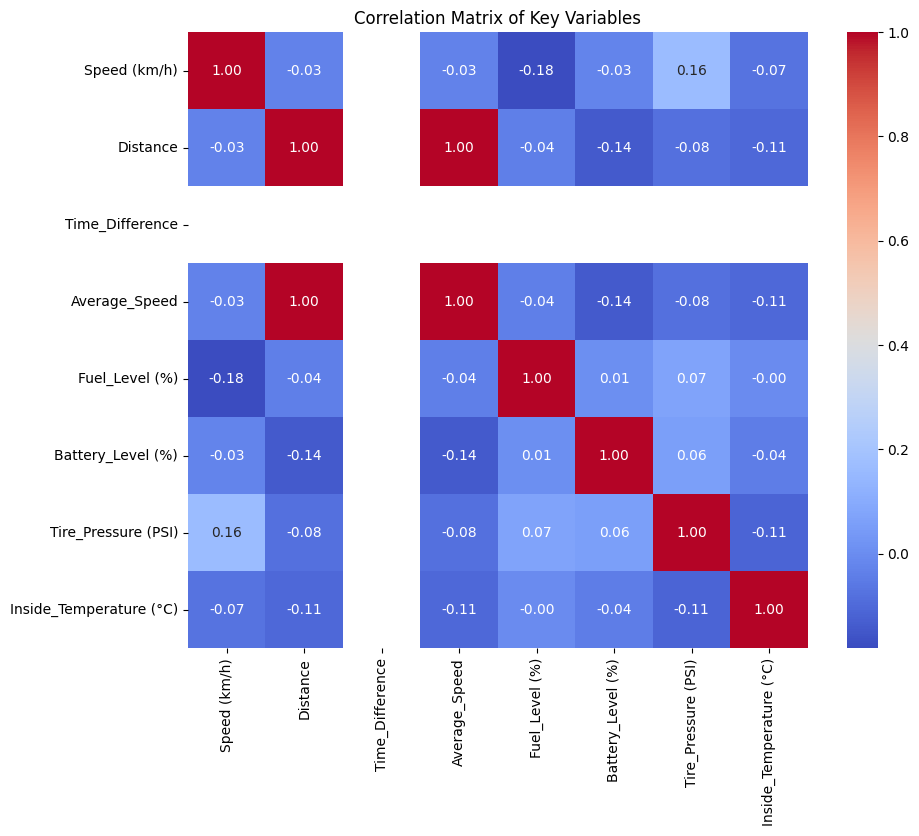

In [18]:
key_variables = ['Speed (km/h)', 'Distance', 'Time_Difference', 'Average_Speed', 'Fuel_Level (%)', 'Battery_Level (%)']
descriptive_stats = df.groupby('Vehicle_ID')[key_variables].describe()
display(descriptive_stats)

# Correlation analysis
correlation_matrix = df[['Speed (km/h)', 'Distance', 'Time_Difference', 'Average_Speed', 'Fuel_Level (%)', 'Battery_Level (%)', 'Tire_Pressure (PSI)', 'Inside_Temperature (°C)']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

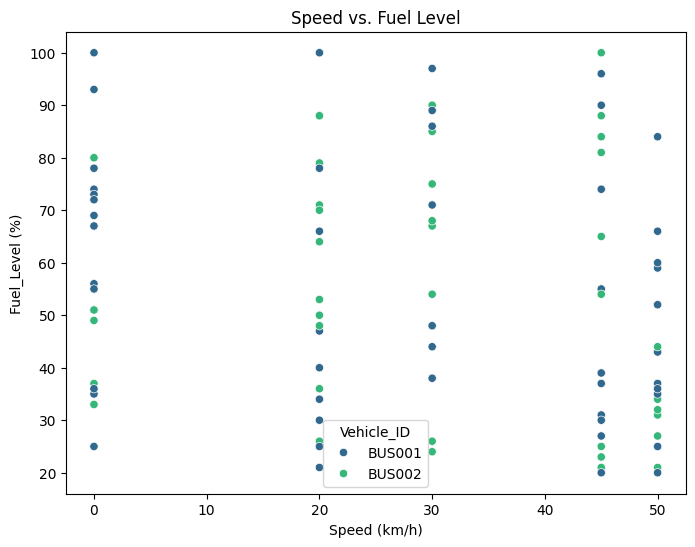

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed (km/h)', y='Fuel_Level (%)', data=df, hue='Vehicle_ID', palette='viridis')
plt.title('Speed vs. Fuel Level')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel_Level (%)')
plt.show()

In [20]:
stopped_count = df[df['Speed (km/h)'] < 5].shape[0]
print(f"Number of times the vehicle stopped (speed < 5 km/h): {stopped_count}")

Number of times the vehicle stopped (speed < 5 km/h): 22


## ***Data visualization***

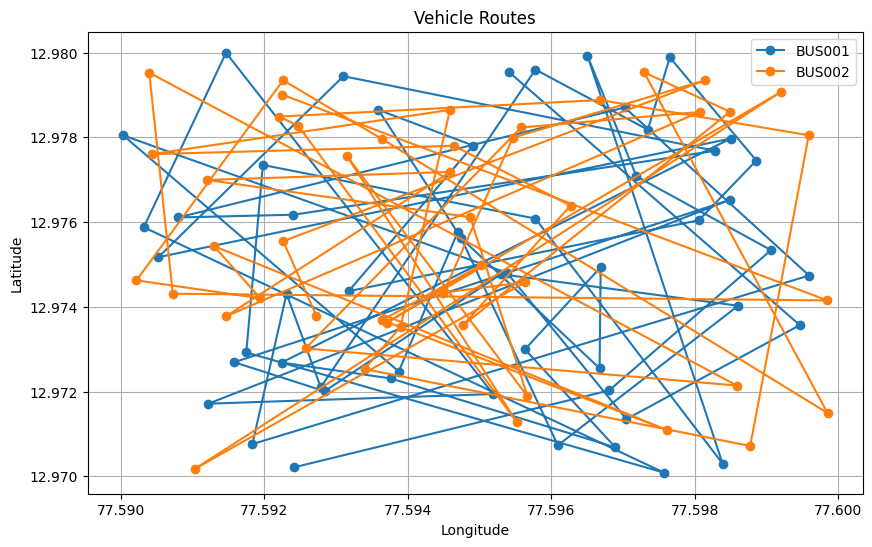

In [23]:
# Route Visualization
plt.figure(figsize=(10, 6))
for vehicle in df['Vehicle_ID'].unique():
    vehicle_data = df[df['Vehicle_ID'] == vehicle]
    plt.plot(vehicle_data['Longitude'], vehicle_data['Latitude'], label=vehicle, marker='o', linestyle='-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vehicle Routes')
plt.legend()
plt.grid(True)
plt.show()

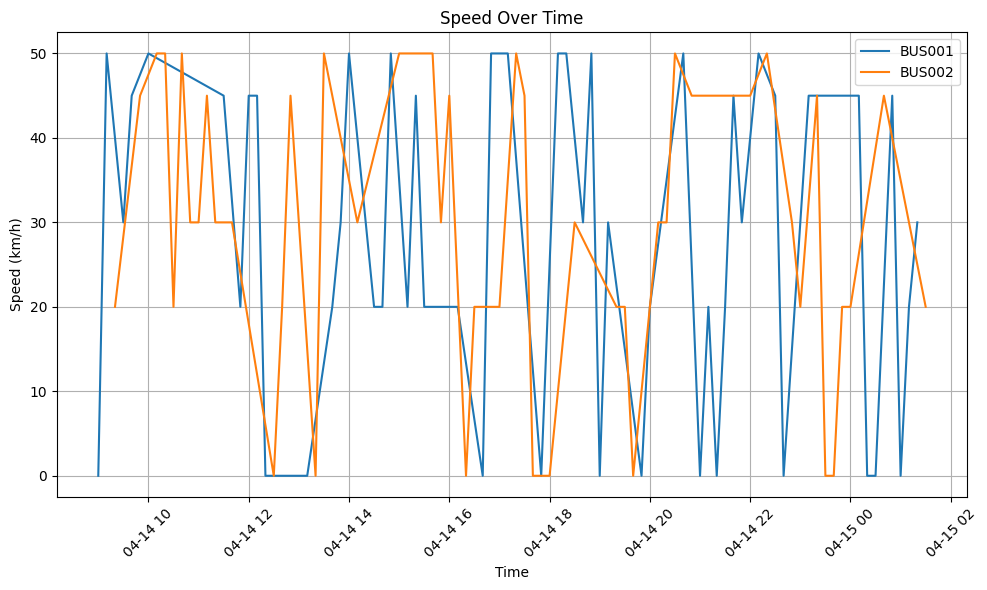

In [24]:
# Speed Over Time
plt.figure(figsize=(10, 6))
for vehicle in df['Vehicle_ID'].unique():
    vehicle_data = df[df['Vehicle_ID'] == vehicle]
    plt.plot(vehicle_data['Timestamp'], vehicle_data['Speed (km/h)'], label=vehicle)
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.title('Speed Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

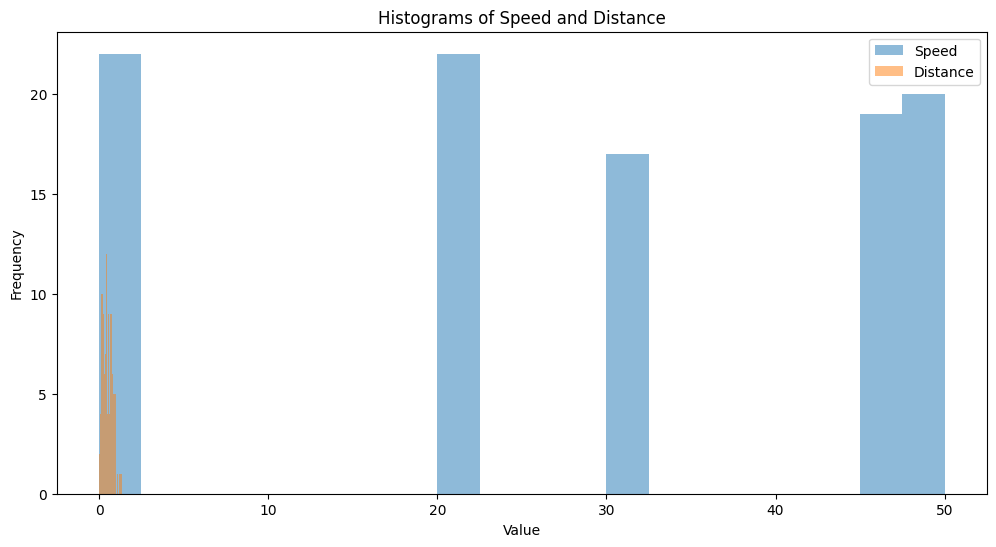

In [25]:
# Histograms
plt.figure(figsize=(12, 6))
plt.hist(df['Speed (km/h)'], bins=20, alpha=0.5, label='Speed')
plt.hist(df['Distance'], bins=20, alpha=0.5, label='Distance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Speed and Distance')
plt.legend()
plt.show()

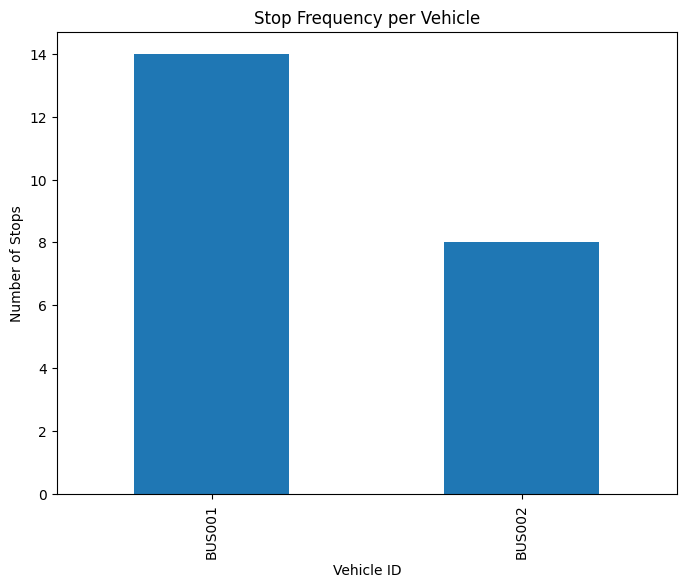

In [26]:
# Stop Frequency Visualization
stops = df[df['Speed (km/h)'] < 5]
stop_counts = stops.groupby('Vehicle_ID').size()
plt.figure(figsize=(8, 6))
stop_counts.plot(kind='bar')
plt.xlabel('Vehicle ID')
plt.ylabel('Number of Stops')
plt.title('Stop Frequency per Vehicle')
plt.show()

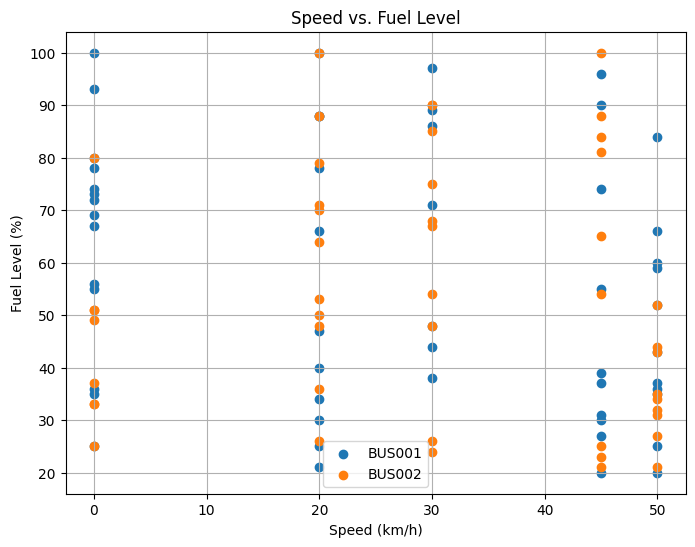

In [27]:
# Speed vs. Fuel Level
plt.figure(figsize=(8, 6))
for vehicle in df['Vehicle_ID'].unique():
  vehicle_data = df[df['Vehicle_ID'] == vehicle]
  plt.scatter(vehicle_data['Speed (km/h)'], vehicle_data['Fuel_Level (%)'], label=vehicle)
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Level (%)')
plt.title('Speed vs. Fuel Level')
plt.legend()
plt.grid(True)
plt.show()